# 🍷 Qualidade do vinho - predição

Previsão da qualidade de vinhos tintos e brancos do norte de Portugal com base em características físico-químicas.  
Este projeto aplica técnicas de **Machine Learning** para classificar ou prever a pontuação sensorial do **vinho**, utilizando os dados apresentados em [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016).

## Importando Bibliotecas

Nesta etapa, importamos as bibliotecas essenciais para análise de dados, visualização e construção de modelos de machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!pip install scikit-learn
!pip install xgboost

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#modelo classificador Random Forest
from sklearn.ensemble import RandomForestClassifier

#Classificador XGBoost
from xgboost import XGBClassifier

#métrica de classificação utilizada
from sklearn.metrics import recall_score, precision_score, precision_recall_curve,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,roc_auc_score,f1_score


## Importando e visualizando base de dados

neste projeto, teremos duas bases de dados diferentes
* `winequality-red`
* `winequality-white`


In [152]:
df_vinho_verde = pd.read_csv("winequality-red.csv", sep=';')
df_vinho_branco = pd.read_csv("winequality-white.csv", sep=';')

visualizando

In [153]:
df_vinho_verde

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


quantidade de registros e variáveis do df_vinho_verde

In [154]:
print('Este dataset contém:')
print('{:,} registros.'.format(df_vinho_verde.shape[0]).replace(',','.'))
print('{} variáveis.'.format(df_vinho_verde.shape[1]))

Este dataset contém:
1.599 registros.
12 variáveis.


In [155]:
df_vinho_branco

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


quantidade de registros e variáveis do df_vinho_branco

In [156]:

print('Este dataset contém:')
print('{:,} registros.'.format(df_vinho_branco.shape[0]).replace(',','.'))
print('{} variáveis.'.format(df_vinho_branco.shape[1]))

Este dataset contém:
4.898 registros.
12 variáveis.


Ambas as bases de dados possuem 12 colunas

<table>
<tr><td align='center'><b>Base</b></td><td align='center'><b>Colunas</b></td></tr>
<tr><td align='center'>df_vinho_branco</td><td align='center'>12</td></tr>
<tr><td align='center'>df_vinho_verde</td><td align='center'>12</td></tr>
</table>

como os atributos são os mesmos, isso permique que nós a concatenemos

## Juntando as bases

In [157]:
# Adicionando a coluna 'tipo' para identificar o vinho
df_vinho_verde['tipo'] = 'tinto'
df_vinho_branco['tipo'] = 'branco'

# Concatenando as duas bases
df_vinhos = pd.concat([df_vinho_verde, df_vinho_branco], axis=0).reset_index(drop=True)

# Colunas originais sem a coluna 'tipo'
cols = [c for c in df_vinhos.columns if c != 'quality']  # pega todas exceto 'quality'

# Agora monta a lista com todas exceto 'quality' + 'quality' no final
cols = [c for c in cols if c != 'tipo'] + ['tipo', 'quality']

# Reordena o DataFrame
df_vinhos = df_vinhos[cols]

# Verifique o resultado
print(df_vinhos.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'tipo', 'quality'],
      dtype='object')


Agora, vamos avaliar quantos registros **únicos** temos em **cada** variável. Isto é importante, porque variáveis com valores únicos não irão **alterar** nosso modelo e registros que apresentam **muitos** valores devem ser **analisados** separadamente.

In [158]:
df_vinhos.nunique().sort_values(ascending=True)

tipo                      2
quality                   7
citric acid              89
fixed acidity           106
pH                      108
sulphates               111
alcohol                 111
free sulfur dioxide     135
volatile acidity        187
chlorides               214
total sulfur dioxide    276
residual sugar          316
density                 998
dtype: int64

vamos tornar isso um problema de classificação, transformando a coluna quality, que tem valores núméricos em classes ['baixo,médio,alto']

In [159]:
def classificar_qualidade(q):
    if q <= 4:
        return 'baixo'
    elif q <= 6:
        return 'médio'
    else:
        return 'alto'

df_vinhos['quality_label'] = df_vinhos['quality'].apply(classificar_qualidade)


In [160]:
df_vinhos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,tipo,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,tinto,5,médio
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,tinto,5,médio
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,tinto,5,médio
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,tinto,6,médio
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,tinto,5,médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,branco,6,médio
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,branco,5,médio
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,branco,6,médio
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,branco,7,alto


In [161]:
df_vinhos = df_vinhos.drop('quality', axis=1)

In [163]:
df_vinhos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,tipo,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,tinto,médio
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,tinto,médio
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,tinto,médio
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,tinto,médio
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,tinto,médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,branco,médio
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,branco,médio
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,branco,médio
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,branco,alto


## Visualizando df após alterações

In [164]:
df_vinhos.shape

(6497, 13)

Avaliando outliers

In [165]:
df_vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


Avaliando dispersão

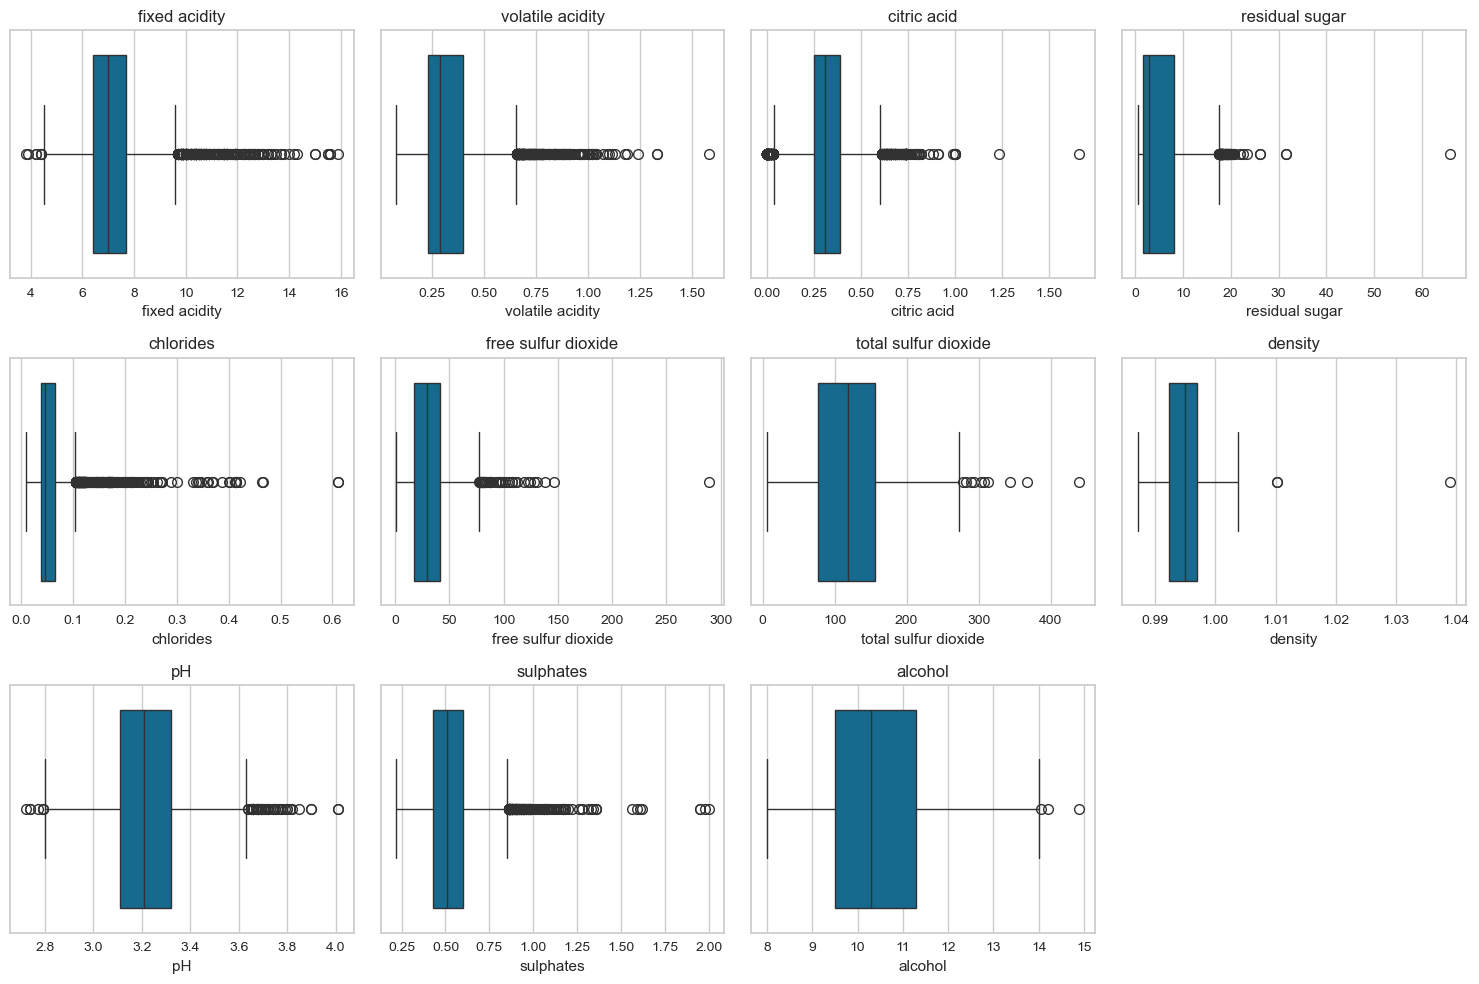

In [166]:
colunas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
           'density', 'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(15, 10))

for i, coluna in enumerate(colunas, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_vinhos[coluna])
    plt.title(coluna)

plt.tight_layout()
plt.show()

vizualizando correlação

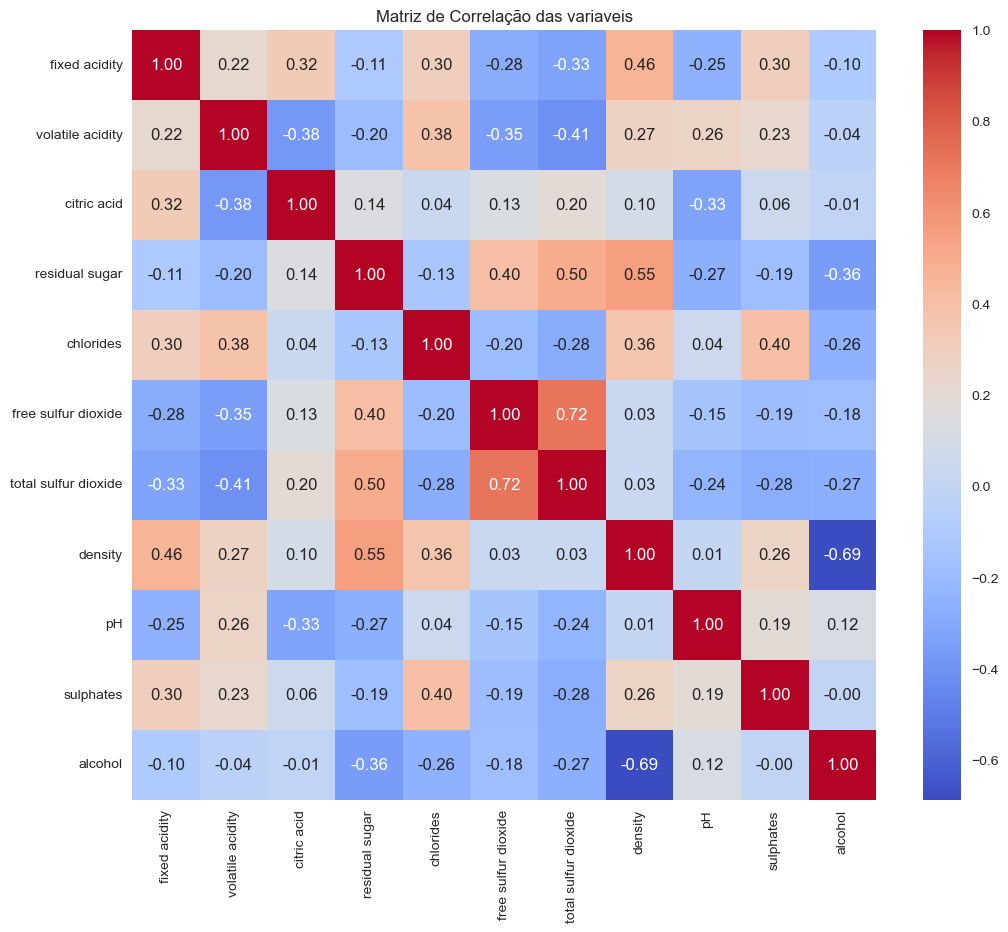

In [167]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_vinhos.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação das variaveis')
plt.show()


In [170]:
from sklearn.ensemble import RandomForestClassifier

# Separando features e target
X = df_vinhos.drop(['quality_label'], axis=1)
y = df_vinhos['quality_label']

# Treinando o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Importância dos atributos
importancias = pd.Series(model.feature_importances_, index=X.columns)
importancias.sort_values().plot(kind='barh', figsize=(10, 6), title='Importância das Features')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()


ValueError: could not convert string to float: 'tinto'

In [168]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleciona os K melhores atributos
selector = SelectKBest(score_func=f_classif, k=7)
X_new = selector.fit_transform(X, y)

# Mostra quais foram selecionados
selected_cols = X.columns[selector.get_support()]
print("Atributos selecionados:", selected_cols.tolist())


Atributos selecionados: ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol']


mais uma remoção

In [169]:
df_vinhos = df_vinhos.drop('total sulfur dioxide', axis=1) 

df_vinhos

Observo que muitas variaveis têm valores discrepantes, por isso irei colocar tudo na mesma escala, to tratando das variaveis X

## Divisão entre previsores e classe

In [21]:
X_base = df_vinhos.iloc[:,0:10].values

In [22]:
X_base[0]

array([ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    ,  0.9978,
        3.51  ,  0.56  ,  9.4   ])

In [23]:
y_base = df_vinhos.iloc[:,10].values

In [24]:
y_base

array(['médio', 'médio', 'médio', ..., 'médio', 'alto', 'médio'],
      dtype=object)

## Normalização das variáveis numéricas

### Escalonamento das variáveis numéricas

In [25]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_base = scaler_census.fit_transform(X_base)

In [26]:
X_base[0]

array([ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
       -1.10013986,  1.03499282,  1.81308951,  0.19309677, -0.91546416])

In [27]:
np.max(X_base)

np.float64(15.842186667107608)

In [28]:
np.min(X_base)

np.float64(-3.100615026416989)

## Divisão das bases em treino e teste

In [30]:
X_treinamento,X_teste, y_treinamento, y_teste = train_test_split(X_base, y_base, test_size=0.25, random_state=0)

In [39]:
X_treinamento.shape, y_treinamento.shape

((4872, 10), (4872,))

In [38]:
X_teste.shape, y_teste.shape

((1625, 10), (1625,))

## Modelos de treinamento

### Árvore de decisão

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
arvore_decisao = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_decisao.fit(X_treinamento, y_treinamento)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
previsoes = arvore_decisao.predict(X_teste)

In [45]:
previsoes

array(['médio', 'médio', 'médio', ..., 'médio', 'médio', 'médio'],
      dtype=object)

In [46]:
y_teste

array(['médio', 'médio', 'médio', ..., 'médio', 'médio', 'médio'],
      dtype=object)

In [47]:
from sklearn.metrics import accuracy_score, classification_report

In [48]:
accuracy_score(y_teste,previsoes)

0.7864615384615384

0.7864615384615384

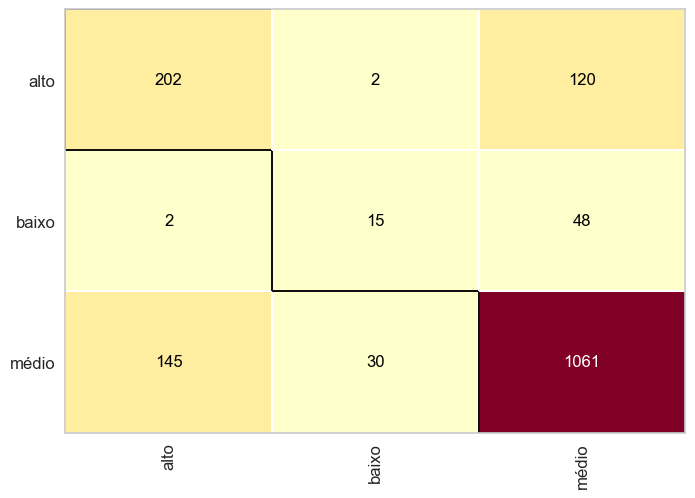

In [50]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_decisao)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [52]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

        alto       0.58      0.62      0.60       324
       baixo       0.32      0.23      0.27        65
       médio       0.86      0.86      0.86      1236

    accuracy                           0.79      1625
   macro avg       0.59      0.57      0.58      1625
weighted avg       0.78      0.79      0.79      1625



desempenho mediano para ruim

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
random_forest = RandomForestClassifier(n_estimators= 10, criterion='entropy', random_state=0)

In [113]:
random_forest.fit(X_treinamento,y_treinamento)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [114]:
previsoes = random_forest.predict(X_teste)

In [115]:
previsoes

array(['médio', 'médio', 'médio', ..., 'médio', 'médio', 'médio'],
      dtype=object)

In [116]:
y_teste

array(['médio', 'médio', 'médio', ..., 'médio', 'médio', 'médio'],
      dtype=object)

In [117]:
accuracy_score(y_teste,previsoes)

0.8375384615384616

In [118]:
print(classification_report(y_teste,previsoes))

              precision    recall  f1-score   support

        alto       0.71      0.62      0.66       324
       baixo       0.67      0.12      0.21        65
       médio       0.87      0.93      0.90      1236

    accuracy                           0.84      1625
   macro avg       0.75      0.56      0.59      1625
weighted avg       0.83      0.84      0.82      1625



0.8375384615384616

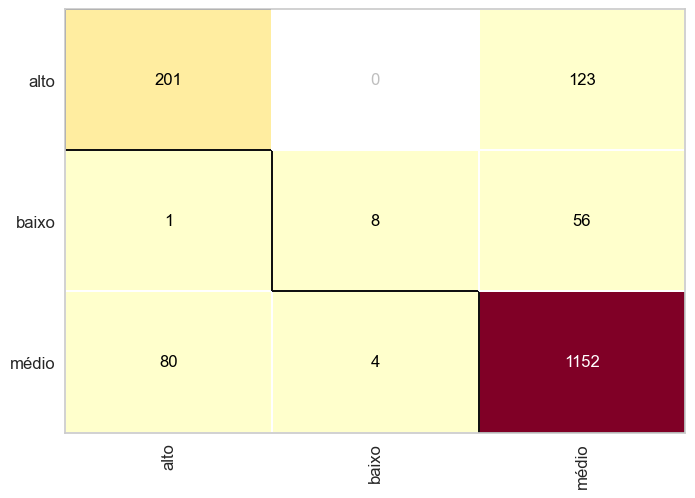

In [119]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

### Regressão Logística

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
log_model = LogisticRegression(max_iter=1000, random_state=0)
log_model.fit(X_treinamento, y_treinamento)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [123]:
previsoes = log_model.predict(X_teste)

In [124]:
accuracy_score(y_teste,previsoes)

0.7741538461538462

0.7741538461538462

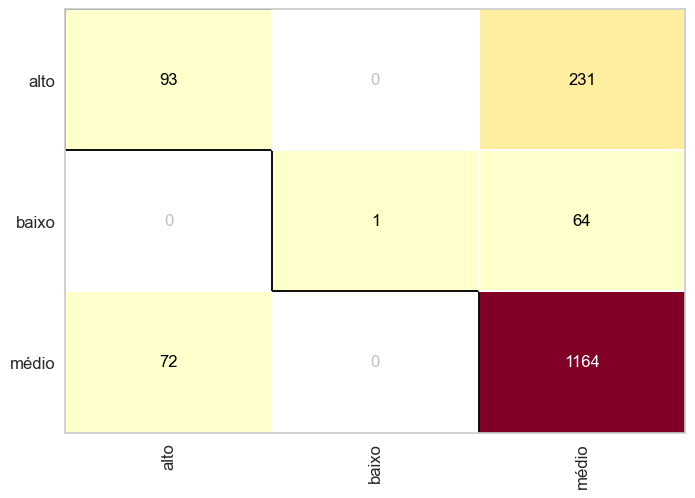

In [125]:
cm = ConfusionMatrix(log_model)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

### XGBoost Classifier

In [126]:
from xgboost import XGBClassifier

In [128]:

from sklearn.preprocessing import LabelEncoder

# Criando o codificador
le = LabelEncoder()

# Aplicando nos conjuntos de treino e teste
y_treinamento_encoded = le.fit_transform(y_treinamento)
y_teste_encoded = le.transform(y_teste)


C:\Users\Bureau\miniconda3\envs\pydata-book\lib\site-packages\xgboost\training.py:183: UserWarning: [15:10:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.8406153846153847
              precision    recall  f1-score   support

        alto       0.75      0.59      0.66       324
       baixo       0.64      0.11      0.18        65
       médio       0.86      0.94      0.90      1236

    accuracy                           0.84      1625
   macro avg       0.75      0.55      0.58      1625
weighted avg       0.83      0.84      0.82      1625



0.8406153846153847

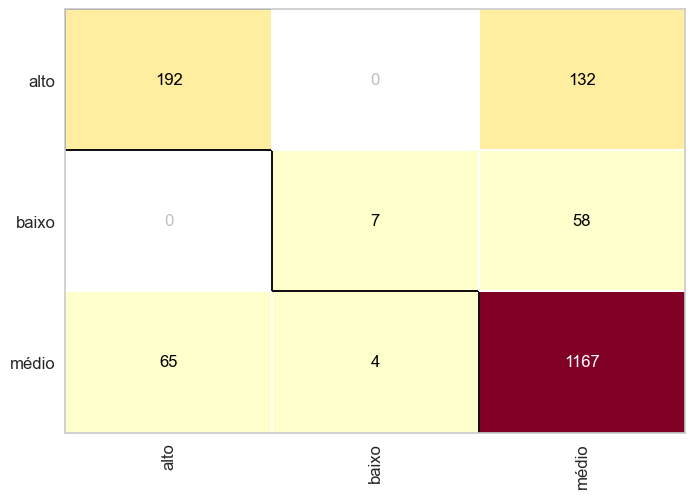

In [129]:
from xgboost import XGBClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report

# Instanciando o modelo
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)

# Treinando com labels numéricos
xgb_model.fit(X_treinamento, y_treinamento_encoded)

# Previsões
y_pred_xgb = xgb_model.predict(X_teste)

# Decodificando os rótulos de volta para strings (opcional, para análise)
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb)

# Avaliação
print("Acurácia:", accuracy_score(y_teste, y_pred_xgb_labels))
print(classification_report(y_teste, y_pred_xgb_labels))

# Matriz de confusão com labels string
cm = ConfusionMatrix(xgb_model, classes=le.classes_)
cm.fit(X_treinamento, y_treinamento_encoded)
cm.score(X_teste, y_teste_encoded)


ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
!pip install lightgbm

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 4872, number of used features: 10
[LightGBM] [Info] Start training from score -1.631645
[LightGBM] [Info] Start training from score -3.292763
[LightGBM] [Info] Start training from score -0.264954
Acurácia: 0.8344615384615385
              precision    recall  f1-score   support

        alto       0.73      0.57      0.64       324
       baixo       0.67      0.09      0.16        65
       médio       0.85      0.94      0.90      1236

    accuracy                           0.83      1625
   macro avg       0.75      0.53      0.57      1625
weighted avg       0.82      0.83      0.82      1625



C:\Users\Bureau\miniconda3\envs\pydata-book\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bureau\miniconda3\envs\pydata-book\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bureau\miniconda3\envs\pydata-book\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Bureau\miniconda3\envs\pydata-book\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.8344615384615385

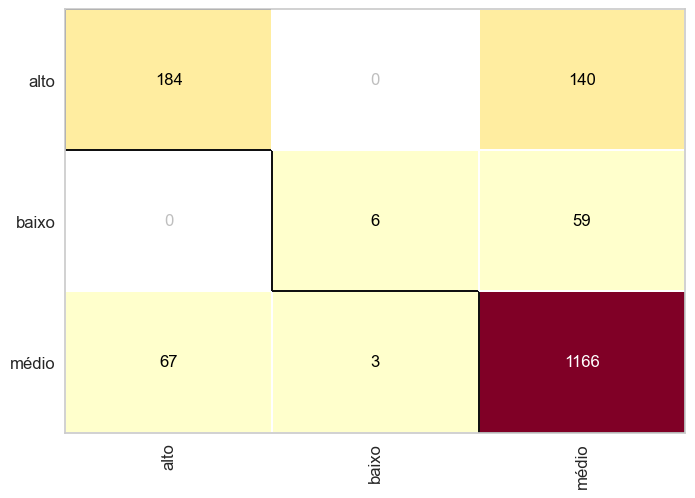

In [132]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

# Modelo
lgbm_model = LGBMClassifier(random_state=0)
lgbm_model.fit(X_treinamento, y_treinamento)

# Previsões
y_pred_lgbm = lgbm_model.predict(X_teste)

# Avaliação
print("Acurácia:", accuracy_score(y_teste, y_pred_lgbm))
print(classification_report(y_teste, y_pred_lgbm))

# Matriz de confusão
cm = ConfusionMatrix(lgbm_model)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)
